In [1]:
from shapely.geometry import Point
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import folium
import numpy as np

from math import radians
from numpy import sin, cos, arcsin, sqrt
from haversine import haversine, Unit

from datetime import datetime
from datetime import timedelta

In [2]:
may = pd.read_pickle("data/may.pkl")
june = pd.read_pickle("data/june.pkl")
july = pd.read_pickle("data/july.pkl")

In [3]:
all_months = pd.concat([may, june, july])

In [4]:
all_months.head(1)

companyName        sumdID  tripDuration  tripDistance  Month  Day  Hour  \
0        Bird  Powered9EAJL           3.0     958.00528      5    1     0   

                  start_geo                             end_geo  
0  POINT (36.1571 -86.8036)  POINT (36.1566 -86.80670000000001)

In [5]:
all_months.head(1)

companyName        sumdID  tripDuration  tripDistance  Month  Day  Hour  \
0        Bird  Powered9EAJL           3.0     958.00528      5    1     0   

                  start_geo                             end_geo  
0  POINT (36.1571 -86.8036)  POINT (36.1566 -86.80670000000001)

In [6]:
all_months.loc[all_months.companyName == 'Bolt']

Empty DataFrame
Columns: [companyName, sumdID, tripDuration, tripDistance, Month, Day, Hour, start_geo, end_geo]
Index: []

In [7]:
pd.value_counts(all_months.companyName)

Lime             210019
Lyft             112978
Bird              93749
SPIN              33181
JUMP               5998
Gotcha             2690
Bolt Mobility       593
Name: companyName, dtype: int64

# Creating individual data frames for each company for each month

In [8]:
def companies(df):
    """This will import csv files, create datetime columns, filter data, remove unecessary columns, create a unique month df."""
    
    #establishing the capability to assign to a variable
    global lime_may
    global bird_may
    global lyft_may
    global jump_may
    global spin_may
    global gotcha_may
    global bolt_may
    
    global lime_june
    global bird_june
    global lyft_june
    global jump_june
    global spin_june
    global gotcha_june
    global bolt_june
    
    global lime_july
    global bird_july
    global lyft_july
    global jump_july
    global spin_july
    global gotcha_july
    global bolt_july

    #creating the MAY variable data frames
    lime_may = df.loc[(df.companyName == 'Lime') & (df.Month == 5)]
    bird_may = df.loc[(df.companyName == 'Bird') & (df.Month == 5)]
    lyft_may = df.loc[(df.companyName == 'Lyft') & (df.Month == 5)]
    jump_may = df.loc[(df.companyName == 'JUMP') & (df.Month == 5)]
    spin_may = df.loc[(df.companyName == 'SPIN') & (df.Month == 5)]
    gotcha_may = df.loc[(df.companyName == 'Gotcha') & (df.Month == 5)]
    bolt_may = df.loc[(df.companyName == 'Bolt Mobility') & (df.Month == 5)]
    
    #creating the June variable data frames
    lime_june = df.loc[(df.companyName == 'Lime') & (df.Month == 6)]
    bird_june = df.loc[(df.companyName == 'Bird') & (df.Month == 6)]
    lyft_june = df.loc[(df.companyName == 'Lyft') & (df.Month == 6)]
    jump_june = df.loc[(df.companyName == 'JUMP') & (df.Month == 6)]
    spin_june = df.loc[(df.companyName == 'SPIN') & (df.Month == 6)]
    gotcha_june = df.loc[(df.companyName == 'Gotcha') & (df.Month == 6)]
    bolt_june = df.loc[(df.companyName == 'Bolt Mobility') & (df.Month == 6)]
    
    #creating the MAY variable data frames
    lime_july = df.loc[(df.companyName == 'Lime') & (df.Month == 7)]
    bird_july = df.loc[(df.companyName == 'Bird') & (df.Month == 7)]
    lyft_july = df.loc[(df.companyName == 'Lyft') & (df.Month == 7)]
    jump_july = df.loc[(df.companyName == 'JUMP') & (df.Month == 7)]
    spin_july = df.loc[(df.companyName == 'SPIN') & (df.Month == 7)]
    gotcha_july = df.loc[(df.companyName == 'Gotcha') & (df.Month == 7)]
    bolt_july = df.loc[(df.companyName == 'Bolt Mobility') & (df.Month == 7)]

In [9]:
companies(all_months)

# Creating a function that will check each individual COMPANY data frame and calculate the average number of rides for the month as well as the number of scooters that averaged more than 3 rides per day

In [10]:
def company_counts(month, company_name, df):
    #company ride average and ride_counts per month
    
    if month == 'May':
        id_counts = pd.value_counts(df.sumdID)/31
    
    elif month == 'June':
        id_counts = pd.value_counts(df.sumdID)/30
    
    elif month == 'July':
        id_counts = pd.value_counts(df.sumdID)/31
    
    id_average = sum(id_counts) / len(id_counts)
    
    return pd.value_counts(id_counts > 3), print(company_name + "'s average rides per scooter during the month of " 
                                                 + month + " = ", id_average)

In [11]:
company_counts('July', 'Bird', bird_july)

Bird's average rides per scooter during the month of July =  0.2916197454136033


(False    2263
 Name: sumdID, dtype: int64, None)

In [12]:
def company_average(month, df):
    #company ride average per month
    
    if month == 'May':
        id_counts = pd.value_counts(df.sumdID)/31
    
    elif month == 'June':
        id_counts = pd.value_counts(df.sumdID)/30
    
    elif month == 'July':
        id_counts = pd.value_counts(df.sumdID)/31
    
    id_average = sum(id_counts) / len(id_counts)
    
    return id_average

In [13]:
bird_july.head()

companyName        sumdID  tripDuration  tripDistance  Month  Day  Hour  \
19        Bird  PoweredI5BFF          13.0      5249.344      7    1     0   
20        Bird  PoweredPQLXE           5.0      1968.504      7    1     0   
22        Bird  PoweredUQE8Q           6.0      2624.672      7    1     0   
41        Bird  PoweredVZBRL          11.0       656.168      7    1     0   
42        Bird  Powered9Y3SG           5.0      2952.756      7    1     0   

                             start_geo                   end_geo  
19            POINT (36.1783 -86.7773)  POINT (36.1782 -86.7748)  
20  POINT (36.1642 -86.76949999999999)    POINT (36.16 -86.7754)  
22            POINT (36.1581 -86.7843)  POINT (36.1582 -86.7841)  
41  POINT (36.1681 -86.78270000000001)  POINT (36.1679 -86.7834)  
42            POINT (36.1564 -86.7744)  POINT (36.1595 -86.7764)

In [14]:
company_average('July', bird_july)

0.2916197454136033

In [15]:
for company in may:
    values = company_average('month', may)
return values

UnboundLocalError: local variable 'id_counts' referenced before assignment

# Creating functions that will calculate the average number of rides per scooter per month across all companies, and the number of scooters that gave at least 3 rides per day

In [16]:
def ride_counts(month, df):
    #global ride_counts
    
    if month == 'may':
        id_counts = pd.value_counts(df.sumdID)/31
    
    elif month == 'june':
        id_counts = pd.value_counts(df.sumdID)/30
    
    elif month == 'july':
        id_counts = pd.value_counts(df.sumdID)/31
    
    id_average = sum(id_counts) / len(id_counts)
    
    return pd.value_counts(id_counts > 3), print(month + "'s average rides per scooter =", id_average)

In [17]:
def ride_average(month, df):
    #global ride_counts
    
    if month == 'may':
        id_counts = pd.value_counts(df.sumdID)/31
    
    elif month == 'june':
        id_counts = pd.value_counts(df.sumdID)/30
    
    elif month == 'july':
        id_counts = pd.value_counts(df.sumdID)/31
    
    id_average = sum(id_counts) / len(id_counts)
    
    return id_average

In [18]:
ride_counts('july', july)

july's average rides per scooter = 0.6122705931241326


(False    5146
 True       55
 Name: sumdID, dtype: int64, None)

In [31]:
may_avg = ride_average('may', may)
june_avg = ride_average('june', june)
july_avg = ride_average('july', july)

avg_list = [may_avg, june_avg, july_avg]

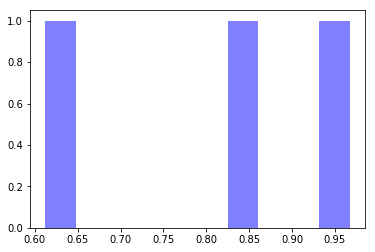

In [33]:
plt.hist(avg_list, facecolor='blue', alpha=0.5)
plt.show()

In [32]:
avg_list

[0.9672780365845185, 0.8470557554895219, 0.6122705931241326]